# 3.1. Regressão Logística
---

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

### Roteiro da Aula

1. Introdução  
    a. Problemas de classificação    
    b. Resolver um problema de classificação com Regressão Linear?    
    c. A matemática por trás da Regressão Logística
2. Aplicando a Regressão Logística nos dados do Titanic  
    a. Analisando os coeficientes da Regressão Logística  
    b. Adicionando mais variáveis explicativas 

## 1) Introdução

**Problemas de classificação** são aqueles em que queremos determinar a que **categoria ou classe** dentro de um **conjunto discreto de classes** uma dada observação pertence, com base em suas features.

Para isso, construímos um **classificador**: modelo que tem como input as features (contínuas ou discretas) e como output uma entre as classes (discretas).

> Principal diferença entre problemas de regressão e classificação:
> - Regressão: valores contínuos;
> - Classificação: valores (classes) discretas (binárias ou não).

<br />

<img src="https://i0.wp.com/vinodsblog.com/wp-content/uploads/2018/11/Classification-vs-Regression.png?fit=2048%2C1158&ssl=1" width=700>

<br/>

<img src="https://i.pinimg.com/originals/71/8e/6a/718e6a40e1782bead960e58d3c52663b.png" width=300>

Problemas de classificação são comumente divididos com relação ao **número de classes** a serem preditas (isto é, com relação à estrutura do espaço de target):

- Classificação binária: duas classes (0 e 1);
- Classificação multiclasse: $n$ classes (0, 1, ..., $n-1$), com $n > 2 \in \mathbb{N}$

Exemplos de problemas de classificação:
- Detecção de e-mails SPAM: um e-mail é SPAM ou não?;
    - Features: palavras contidas no corpo do e-mail; remetente; assunto;
- Detecção de doenças: que codição médica a pessoa tem?
    - Features: sintomas fisiológicos; resultados de exames (medidas de variáveis biológicas);
- Detecção do tipo de documento: secreto, confidencial ou não-sensível?
    - Features: palavras no corpo do texto; título;
- Detecção de fraudes de cartão de crédito: uma operação é fraudulenta ou não?;
    - Features: histórico de transações; hora, local e frequência das transações; tipo de compra;
- Modelo de risco de crédito: qual é a chance de determinada pessoa não pagar seu empréstimo?
    - Features: histórico de pagamento; score de crédito;
    
    
<img src="https://developers.google.com/machine-learning/guides/text-classification/images/TextClassificationExample.png" width=500>



Veremos hoje um dos mais simples e importantes classificadores: a **Regressão Logística!**

### Importações

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

sns.set()
pio.templates.default = 'plotly_dark'

### Importando o Dataset

In [3]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Survived', ylabel='count'>

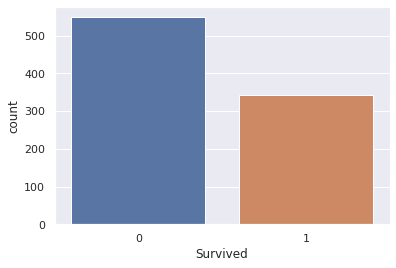

In [6]:
sns.countplot(data=df, x='Survived')

### Introdução Intuitiva

Uma Regressão Linear Múltipla buscar entender os relacionamentos entre diversas variáveis explicativas (x) com a variável resposta (y), que, de forma matemática, busca achar os coeficientes ($\beta_n$) da equação:

$$y = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}$$

No caso das Regressões Lineares, a variável resposta é contínua. Dessa forma, ao tentar estimar o preço de um imóvel usando sua área em $m^2$, quantidade de quartos e quantidade de banheiros, a Regressão Linear pode ser uma boa opção.

Porém, como proceder nos casos que a variável resposta não é contínua, mas binária? Imagine que, dado o valor pago por um passageiro em uma cabine no Titanic, queremos saber se ele sobreviveu ou não? 

Matematicamente, podemos representar a sobrevivência como 1 e a não sobrevivência como 0, e a partir daí fazer a modelagem usando Regressão Linear. Entretanto, ao modelar dessa forma, não estamos restringindo o valor que a variável resposta pode assumir; logo, valores estranhos podem aparecer, como no gráfico.

In [8]:
X = df[['Fare']] # Considerando apenas a taxa paga pela pessoa
y = df['Survived']

In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression().fit(X, y)

In [13]:
y_est = lr.predict(X)

Text(0, 0.5, 'Survived')

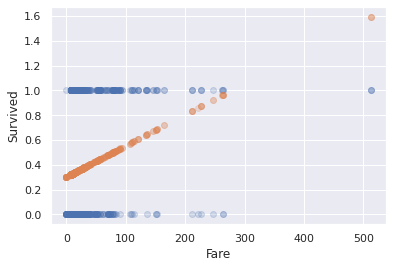

In [18]:
plt.scatter(X, y, alpha=0.2)
plt.scatter(X, y_est, alpha=0.2)
plt.xlabel('Fare')
plt.ylabel('Survived')

### Verificando o mesmo efeito no dataset `breast_cancer.csv`

In [19]:
cancer = pd.read_csv('breast_cancer.csv')

In [20]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [ ]:
# Obtenha uma regressão linear para "estimar" se a pessoa tem um cancer benigno ou maligno
# Estimar o tipo do câncer, com base na coluna "mean radius"

In [25]:
cancer['target'] = cancer.cancer.replace({
    'malignant': 0,
    'benign': 1
})

In [26]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant,0


In [27]:
X_cancer = cancer[['mean radius']]
y_cancer = cancer['target']

In [28]:
lr_cancer = LinearRegression().fit(X_cancer, y_cancer)

In [29]:
y_est_cancer = lr_cancer.predict(X_cancer)

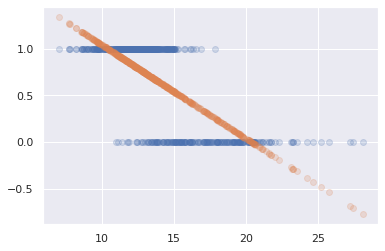

In [31]:
plt.scatter(X_cancer, y_cancer, alpha=0.2)
plt.scatter(X_cancer, y_est_cancer, alpha=0.2)

O eixo Y indica se a pessoa sobreviveu (1) ou não (0). Já o eixo X indica o valor pago pela cabine. É possível perceber que quanto maior o valor pago pela cabine, maior a chance de sobreviver. Porém, chance é sinônimo de probabilidade (estatísticos, me perdoem), que é um valor entre 0 e 1. Dessa forma, o ponto azul na extremidade superior direita nos dá uma intuição de algo errado. Probabilidade de sobrevivência de 1,6? 

A variável resposta predita ao utilizar Regressão Linear para modelar o problema estará vaga, num espectro de valores infinitamente amplo. Nesse cenário de variável resposta binária, se faz necessária a aplicação de algumas transformações para que possamos ajustar um modelo de forma linear.

Para isso, utilizaremos o logito (logit), que é uma função que mapeia a probabilidade de pertencimento a uma classe com amplitude de $\pm \infty$ , ao invés de 0 e 1. Matematicamente, é uma função do tipo $f(x) = \log(\frac{x}{1-x})$ , com o gráfico descrito abaixo. Seu gráfico está descrito na imagem a seguir e podemos vê-la sendo limitada com assíntotas verticais em 0 e 1.

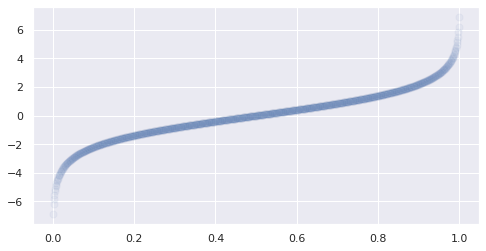

In [6]:
x = np.arange(0.001, 1, 0.001)
y = np.log(x / (1 - x))

plt.figure(figsize = (8, 4))

plt.scatter(x, y, alpha = 0.05, s=50)

Porém, na forma como o gráfico está descrito, o que está sendo limitado é o eixo X, que **no padrão seguido nas aulas** é a nossa variável explicativa. Entretanto, o que precisamos é que a nossa variável resposta, eixo Y, esteja limitada entre 0 e 1. Dessa forma, precisamos do inverso do logito, que é a função logística, dada por $f(x) = \frac{1}{1 + e^{-x}}$. Aplicando a função logística, temos:

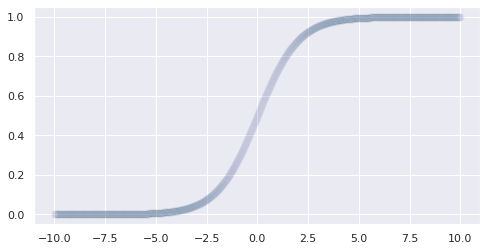

In [23]:
x = np.arange(-10, 10, 0.01)
y = 1/(1 + np.exp(-x))

plt.figure(figsize = (8, 4))

plt.scatter(x, y, alpha = 0.01, s=50)

Como queremos que nossa variável resposta seja uma probabilidade $p$ entre 0 e 1 (redundância proposital), podemos aplicar a função logística na função de Regressão Linear, obtendo:

$$y = p = \frac{1}{1 + e^{-(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$$

<div>
  <img style="display: block; margin: 4rem auto 2rem;" src="https://s3-sa-east-1.amazonaws.com/lcpi/e5ecf372-6790-49db-9bad-95bc4b19df27.png" width="500">
</div>

### Visualizando como a equação linear altera o formato da Regressão Logística

In [33]:
sigmoid = lambda x: 1/(1 + np.exp(-x))

In [34]:
def regressao_linear(x, b0, b1):
  return b0 + b1*x

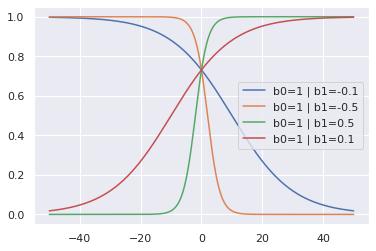

In [36]:
x = np.linspace(-50, 50, 1000)

b0 = 1
b1_list = [-0.1, -0.5, 0.5, 0.1]

for b1 in b1_list:
  y = sigmoid(regressao_linear(x, b0, b1))

  plt.plot(x, y, label=f"b0={b0} | b1={b1}")
  plt.legend()

plt.show()

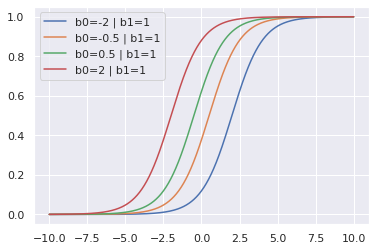

In [39]:
x = np.linspace(-10, 10, 1000)

b1 = 1
b0_list = [-2, -0.5, 0.5, 2]

for b0 in b0_list:
  y = sigmoid(regressao_linear(x, b0, b1))

  plt.plot(x, y, label=f"b0={b0} | b1={b1}")
  plt.legend()

plt.show()

Porém, seria interessante que mantivéssemos a equação em um formato linear, como é na Regressão Linear, afinal, única coisa que queremos modificar é a resposta. Para tirar a função exponencial do denominador da função, usaremos chances ($Odds$) ao invés de probabilidades. Chamaremos de $Odds$ a proporção entre sobrevivência (1) e não sobrevivência (0), ou, em outras palavras, a probabilidade de um evento ocorrer sobre a probabilidade dele não ocorrer. Representamos da seguinte forma:

$$Odds(Y = 1) = \frac{p}{1 - p} $$

**Para pensar:** observando apenas a variável resposta (*Survived*) do Titanic, quais são as chances de sobrevivência? Esses valores sempre estarão compreendidos entre 0 e 1?

- 1: sobreviveu  
- 0: não sobreviveu  

In [24]:
df.Survived.value_counts(True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Chances de sobrevivência:

Chances de não sobrevivência:

**Para pensar:** o que obtemos ao isolar o $p$ na função da $Odds$?

$$
p = \frac{Odds}{Odds + 1}
$$

Dessa forma, já podemos igualar a duas funções $p$. Porém, antes disso, vamos multiplicar a primeira por $\frac{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}{e^{(\beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n})}}$. 

**Para pensar:** o que obtemos?

$$
y = p = \frac{e^x}{1 + e^x}
$$

em que,

$$
    x = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + \dots + \beta_{n} x_{n}
$$

**Para pensar:** e agora, igualando...

$$
Odds = e^x
$$

In [4]:
e = np.e

In [ ]:
e

2.718281828459045

$$
    \ln{(Odds)} = \beta_{0} + \beta_{1} x_{1} + \beta_{2} x_{2} + ... + \beta_{n} x_{n}
$$

Dessa forma, estamos mapeando em chances qualquer valor $(-\infty, \infty)$, usando um modelo linear para prever essa probabilidade. Por sua vez, podemos mapear esse valor para definir a sobrevivência ou não sobrevivência a partir de um ponto de corte: qualquer valor de probabilidade acima de 0.5, por exemplo, pode ser definido como sobrevivência.

___

### Função de perda e algoritmo de aprendizagem

A função de perda para a regressão logística é a famosa [binary cross-entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a), também conhecida como [log loss](https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training).

Esta função será de enorme importância no estudo de **redes neurais**.

As principais implementações do algoritmo de aprendizagem da regressão logística se baseia no [método de máxima verossimilhança](https://pt.wikipedia.org/wiki/M%C3%A1xima_verossimilhan%C3%A7a). 


_________

### Aplicando uma Regressão Logística aos dados do Titanic

### Visualizando a predição feita com a Regressão Logística

### Coeficientes da Regressão Logística

Trazendo para o exemplo do Titanic, podemos visualizar os coeficientes da equação. 

**O que está errado na frase?**

Ao aumentar um dólar na taxa paga no Titanic, estaremos aumentando a nossa chance de sobrevivência em 0.01 vezes.

**Frase correta**

Ao aumentar um dólar na taxa paga no Titanic, estaremos aumentando o **logaritmo das chances** de sobrevivência em 0.01 vezes.

**Para pensar:** assim, podemos interpretar que cada dólar a mais pago na cabine do Titanic aumenta as chances de sobrevivência do passageiro em quanto?

Até agora estamos modelando as chances/probabilidades de sobrevivência em termos do valor pago na cabine. Porém, da mesma forma que na Regressão Linear, na Regressão Logística também podemos fazer uma análise multivariada e modelar com $N$ variáveis. Dessa forma, a vantagem da interpretabilidade do modelo fica ainda mais forte.

**Para pensar:** o que é mais importante na determinação das chances de sobrevivência do passageiro: o preço pago pela cabine, o sexo, a quantidade de irmãos ou parentes?

**Para pensar:** E se a gente adicionar a variável idade? Como ficam as importâncias das variáveis?

### Atividade

Plot a decision region considerando apenas a coluna `Fare` e a coluna `Age`.

## Métricas de Avaliação de Modelos

**O modelo melhorou ao utilizar mais variáveis?**